In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"SMSSpamCollection",sep="\t",names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAZA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [9]:
swords


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAZA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
sent = "Hello ! How are you? you wanna play pubg?"


In [15]:
clean = [word for word in word_tokenize(sent) if word not in swords]
clean

['Hello', '!', 'How', '?', 'wan', 'na', 'play', 'pubg', '?']

In [19]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [21]:
clean = [word for word in word_tokenize(sent) if word.isdigit() or word.isalpha()]
clean =[ps.stem(word) for word in clean if word not in swords]
clean

['hello', 'how', 'wan', 'na', 'play', 'pubg']

In [23]:
def cleanText(sent):
    token = word_tokenize(sent)
    clean = [word for word in token if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords]
    return clean        

In [25]:
cleanText(sent)

['hello', 'how', 'wan', 'na', 'play', 'pubg']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf = TfidfVectorizer(analyzer=cleanText)
x = df['text']
y = df['label']
x_new = tfidf.fit_transform(x)

In [31]:
x.shape

(5572,)

In [33]:
x_new.shape

(5572, 6513)

In [35]:
x_new

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52578 stored elements in Compressed Sparse Row format>

In [39]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'zyada', 'é', 'ü'], dtype=object)

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,random_state=0,test_size=0.25)

In [45]:
x_train.shape

(4179, 6513)

In [47]:
x_test.shape

(1393, 6513)

In [49]:
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model
nb.fit(x_train.toarray(), y_train)


GaussianNB()

In [51]:
y_pred= nb.predict(x_test.toarray())
y_test.value_counts()

label
ham     1208
spam     185
Name: count, dtype: int64

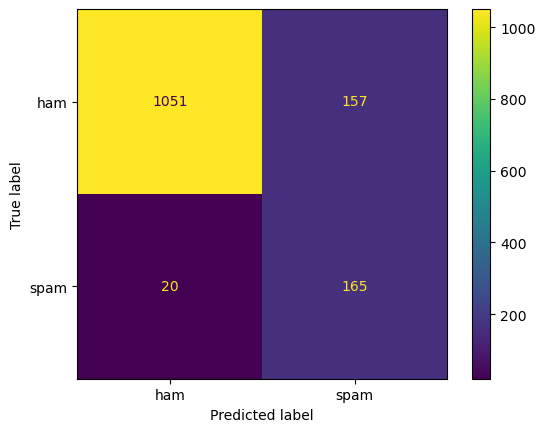

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [57]:
accuracy_score(y_test,y_pred)

0.8729361091170137

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)


RandomForestClassifier(random_state=0)

In [60]:
y_pred = rf.predict(x_test)

In [63]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [65]:
accuracy_score(y_test,y_pred)

0.9806173725771715

In [67]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [69]:
accuracy_score(y_test,y_pred)

0.9641062455132807